### DNN (deep neuarl network)
- Fashion MNIST 데이터셋 알아보기
- 인공 신경망으로 패션 아이템 분류하기
- 성능 측정하기
- 과적합과 드롭아웃

- 인공 신경망을 깊게 쌓아 Fashion MNIST 데이터셋으로 패션 아이템을 분류하는 딥러닝 모델을 만들어 보자

### Fashion MNIST 데이터셋 알아보기
- Garbage in Garbage out
- 딥러닝에 입문하면 흔히 만나는 데이터셋이 MNIST 라는 손글씨 숫자 데이터셋
    - MNIST 데이터베이스: (Modified National Institute of Standards and Technology database)는 손으로 쓴 숫자들로 이루어진 대형 데이터베이스
- Fashion MNIST 는 28 x 28 필셀 70000 개의 흑백 이미지로 구성되며, 신발, 드레스, 가방 등 총 10가지 카테고리 존재
    - 다행이도 토치비전에 fashion mnist 데이터셋을 자동으로 내려받고 학습 데이터를 나눠주는 일을 해줌
    
    
- 토치비전의 몇가지 모듈 확인
    - touch.uitls.data: 데이터셋의 표준을 정의하고 데이터셋을 불러오고 자르고 섞는 데 쓰는 도구들이 들어있는 모듈 
        - torch.utils.data.Dataset: 파이토치 모델을 학습시키기 위한 데이터셋의 표준을 정의
        - torch.utils.data.DataLoader: Dataset 모듈을 상속하는 파생 클래스는 학습에 필요한 데이터를 로딩해주는 해당 인스턴스의 입력으로 사용
    - torchvision.datasets: tourch.utils.data.Dataset을 상속하는 이미지 데이터셋의 모음. 패션 아이템 데이터셋이 들어있음
    - torchvision.transforms: 이미지 데이터셋에 쓸 수 있는 여러 가지 변환 필터를 담고 있는 모듈
    - torchvision.utils: 이미지 데이터를 저장하고 시각화하기 위한 도구

In [48]:
# Fashion MNIST 데이터셋 다뤄보기

from torchvision import datasets, transforms, utils
from torch.utils import data
import matplotlib.pyplot as plt
import numpy as np


In [49]:
# 이미지를 텐서로 바꿔주는 코드.
# 토치비전의 transforms는 입력을 변환시켜주는 도구
# 텐서로 바꿔주는 ToTensor() 함수만 사용하고 있지만 이미지 크기 조정 Resize(), 정규화 해주는 Normalize() 등 함수가 있음
# 기능을 추가하고 싶으면 transforms.compose() 함수 안의 리스트에 넣어주면 순서대로 변환이 이뤄집니다.

transform = transforms.Compose([
    transforms.ToTensor()
])

- 다음은 토치비전 Transforms 에서 자주 쓰이는 기능
    - ToTensor: 이미지를 파이토치 텐서로 변경
    - Resize: 이미지 크기 조정
    - Normalize: 주어진 평균과 표준편차를 이용하여 정규화
    - RandomHorizontalFlip: 무작위로 이미지의 오른쪽과 왼쪽을 뒤집는 기능
    - RandomCrop: 이미지를 무작위로 자르는 기능

In [83]:
# FashionMNIST 데이터셋을 가져옴
# FashionMNIST 데이터셋은 학습용 트레이닝셋과 성능 평가용 테스트셋으로 나뉘어 있습니다.
# 어느 것을 받을지는 'train' 매개 변수에 True나 False를 입력

trainset = datasets.FashionMNIST(
root = './.data/',
train = True,
download = True,
transform = transform
)

testset = datasets.FashionMNIST(
root = './.data/',
train = False,
download = True,
transform = transform
)

In [62]:
batch_size = 16
train_loader = data.DataLoader(
    dataset = trainset,
    batch_size = batch_size
)

test_loader = data.DataLoader(
    dataset = testset,
    batch_size = batch_size
)

In [63]:
# 데이터 뽑아보기
dataiter = iter(train_loader)
images, labels = next(dataiter)

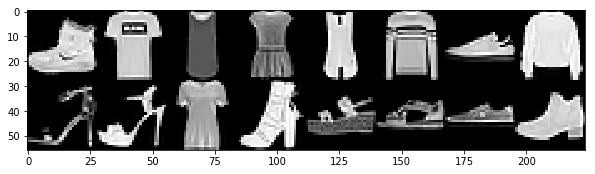

In [64]:
# 토치비전의 utils_make_grid() 함수를 이용하여 여러이미지를 하나의 이미지로 만들수 있음
# img는 파이토치 텐서이기 때문에 numpy() 함수로 맷플롯립과 호환이 되는 넘파이 행렬로 변경
# 맷플롯립이 인식하는 차원의 순서가 다르므로 np.transpose() 함수를 이용해 첫 번째 (0번째) 차원을 맨 뒤로 보냄
img = utils.make_grid(images, padding=0)
npimg = img.numpy()
plt.figure(figsize = (10, 7))
plt.imshow(np.transpose(npimg, (1,2,0)))
plt.show()

In [54]:
print(labels)

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9])


In [10]:
##### 레이블을 해석하기 편하게 딕셔너리 만들기
CLASSES = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

In [11]:
# 라벨 텍스트 출력
for label in labels:
    index = label.item()
    print(CLASSES[index])

Ankle boot
T-shirt/top
T-shirt/top
Dress
T-shirt/top
Pullover
Sneaker
Pullover
Sandal
Sandal
T-shirt/top
Ankle boot
Sandal
Sandal
Sneaker
Ankle boot


- 이미지의 데이터는 가로, 세로, 색상으로 구성된 3차원 행렬로 표현
- 각 픽셀은 0부터 255 까지 값을 가진다
- Fashion MNIST 에서 이미지의 크기는 28 x 28 색상 채널은 흑백 1가지
- 그러므로 입력 x의 특징값 총 개수는 28 x 28 x 1 = 784개

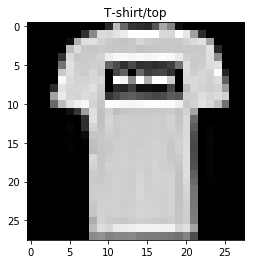

In [55]:
# 개별 이미지 꺼내보기
idx = 1
item_img = images[idx]
item_npimg = item_img.squeeze().numpy()
plt.title(CLASSES[labels[idx].item()])
plt.imshow(item_npimg, cmap='gray')
plt.show()

### 인공 신경망으로 패션 아이템 분류하기

In [15]:
# 파이토치, 인공 신경망 모델의 재료들을 담고 있는 nn 모듈, 최적화를 위한 optim 모듈, nn모듈의 함수버전인 functional을 F로 불러옴
# 토치비전의 데이터셋을 다루기 위해 transforms와 dataset을 임포트

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, datasets


False

In [38]:
# 현재 컴퓨터에서 CUDA를 이용할수 있는지 알아보는 함수
USE_CUDA = torch.cuda.is_available()
# GPU를 가진 누군가가 설정할수 있도록
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

# Fashin MNIST 부터는 데이터가 많아서 한꺼번에 사용하는 것은 호율적이지 ㅇ낳으니
# 여러개의 배치로 잘라서 사용

# 깃허브를 보면 배치 크기와 모델 가중치가 2의 거듭제곱으로 설정된 경우가 많음
# CPU, GPU 메모리 크기가 2의 배수이기 때문에 배치 크기의 2의 n승이면 메모리에서 데이터를 주고받는 효율을 높일 수 있다고 함
EPOCHS = 30
BATCH_SIZE = 64

transform = transforms.Compose([
    transforms.ToTensor()
])

trainset = datasets.FashionMNIST(
root = './.data/',
train = True,
download = True,
transform = transform
)

testset = datasets.FashionMNIST(
root = './.data/',
train = False,
download = True,
transform = transform
)

train_loader = torch.utils.data.DataLoader(
    dataset = trainset,
    batch_size = BATCH_SIZE,
    shuffle = True
)

test_loader = torch.utils.data.DataLoader(
    dataset = testset,
    batch_size = BATCH_SIZE,
    shuffle = True
)

In [17]:
# 이미지 분류를 위한 인공 신경망 구현
# 모델은 입력 x와 레이블 y를 받아 학습한 다음 새로운 x가 왔을 때 어떤 패션아이템인지 예측
# 레이어가 3개인 3층 인공 신경망 사용

# 모델의 가중치 변수들이 들어가는 연산을 선언
# nn.Linear 클래스는 선형결합을 수행하는 객체를 생성

# fc1() 은 픽셀값 784개를 입력받아 가중치를 행렬 곱하고 편향을 더해 값 256개를 출력
# 똑같은 과정으로 fc2(), fc3() 함수를 거쳐 마지막에 값 10개를 출력
# 출력값 10개 각각은 클래스를 나타내며 10개중 가장 값이 큰 클래스가 모델의 예측값

# fc는  'fully connected' 의 약자로 이전 레이어의 모든 노드가 다음 레이어의 모든 노드에 연결된 층
# 다른 말로는 Dense 층이라고 함(케라스에서 주로 활용)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        
    # 입력을 받아 veiw() 함수를 이용하여 1차원 행렬로 만든 후, fc1(), fc2() 함수를 거친 데이터는
    # ReLU() 활성화 함수를 거침 (가중치가 없는 연산은 torch.nn.functional 에 있는 함수를 직접 사용하기도 함)
    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        

In [39]:
# 모델 설계가 끝났으니 모델 선언
# 선언과 동시에 to() 함수로 어디에서 수행할지 정할 수 있음
model = Net().to(DEVICE)

# 최적화 알고리즘으로 파이토치 내장 모듈인 SGD 사용 (확률적 경사하강법)
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 학습은 데이터를 보고 가중치를 조절하는 작업을 반복
def train(model, train_loader, optimizer):
    # 학습할 model, 데이터를 공급해주는 train_loader, 최적화를 담당할 optimizer

    # 학습모드로 바꿈
    # 지금은 모드가 상관없지만 학습/평가 모드에 따라 동작이 다른 파이토치 모듈(드롭아웃 등) 이 있으므로 습관을 들이는게 좋음
    model.train()

    # 모델의 가중치를 GPU로 보냈다면 학습 데이터도 같은 장치로 보내야 연산을 수행할 수 있음
    for batch_idx, (data, target) in enumerate(train_loader):
        # 학습 데이터를 DEVICE의 메모리로 보냄
        data, target = data.to(DEVICE), target.to(DEVICE)

        # 학습 단계는 앞 장과 비슷
        # 반복 떄마다 기울기 계산 : optimizer.zero_grad()
        # 학습 데이터의 대한 모델의 예측값 output 받아옴

        # output과 target의 오차를 구함
        # 앞장은 클래스가 2개 뿐이라서 이진교차엔트로피(binary cross entropy)를 이용했지만
        # 이번장은 10개가 존재하므로 교차 엔트로피 (cross entropy)사용
        # 참조 : https://www.youtube.com/watch?v=jMU9G5WEtBc&feature=youtu.be

        # 오차에서 backward() 함수를 실행하면 기울기가 계산되고
        # optimizer.step() 함수는 계산한 기울기를 앞서 정의한 알고리즘에 맞추어 가중치 수정
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

### 성능 측정
- 세상의 존재하는 모든 데이터에 최적화 하는 것을 일반화(generalization)라 하고
- 학습 데이터를 기반으로 한 모델이 학습하지 않은 데이터에 얼마나 적응하는지를 수치로 나타내는 것을 일반화 오류(generalization error)라고 함
- 일반화 오류는 학습과 실제 성능의 괴리를 뜻하므로 작을수록 좋음



- 학습 데이터의 일부를 떼어내어 평가용 데이터셋 마련
- 보통 테스트셋 이라고 함
- 모델이 학습과정에서 본 적이 없는 '실제 세상의 모든 데이터'를 대표


- Fashion MNIST 는 비교적 규모가 작은 데이터셋이므로 학습과 테스트 두가지로 나눠져 있음
- 일반적인 머신러닝 데이터셋은 학습, 검증, 테스트 3단계로 나뉨
- 학습용 데이터셋은 가중치를 조절하고, 검증용 데이터셋은 배치 크기와 모델 설계 같은 하이퍼파라미터를 조절하는데 사용
    - 하이퍼파라미터: 모델 층의 종류와 크기, 배치크기, 학습률 등 머신러닝 모델이 배우지 않고 사용자가 직접 지정해주는 값
- 테스트용 데이터셋은 성능 보고에 사용

In [42]:
# 모델이 일반화를 얼마나 잘하는지 알아보고, 학습을 언제 멈추어야 할지 알아내는 용도로 epoch이 끝날때 마다 성능 측정
def evaluate(model, test_loader):

    # 모델을 평가 모드로 바꿈
    model.eval()

    # 테스트 오차와 예측이 맞는 수를 0으로 초기화
    test_loss = 0
    correct = 0

    # 학습 때와 같이 데이터를 DEVICE로 보내고 예측값인 output을 받아옴
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)

            # 평가를 위해서는 교차 엔트로피를 거칠 때 reduction='sum'을 지정해주어 미니배치의 평균 대신 합을 받아야함
            # 테스트셋을 모두 돌고나면 test_loss는 모든 테스트셋의 오차의 합이 됨

            # 모든 오차 더하기
            test_loss += F.cross_entropy(output, target, reduction='sum').item()

            # 오차정보도 유용하게 쓰이지만 사람에게 더 직관적인 정보는 '테스트셋에서 모델이 얼마나 맞췄느냐' 이다.
            # ouput.max()함수는 2개의 값을 출력
            # 가장 큰값과 그 값이 있는 자리 (인덱스) 이다

            # 추출한 모델의 예측 패션 아이템과 레이블이 일치하는지 eq() 함수를 이용해 판단
            # 일치하면 1, 아니면 0
            # 배열에서 가장 큰 값이 있는 인덱스를 출력하는 함수를 다른말로 argmax 함수라고 부름

            # 가장 큰값을 가진 클래스가 모델의 예측
            # 예측과 정답을 비교하여 일치할 경우 correct에 1을 더함
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()

    # 이 값들을 테스트셋의 데이터 수로 나눠 평균을 구함
    # 총 정답 평균에는 100을 곱하여 정확도(accuracy)를 구함
    test_loss /= len(test_loader.dataset)
    test_accuracy = 100 * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [43]:
# 코드를 돌려서 실제로 학습이 되는지 확인
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)
    
    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(epoch, test_loss, test_accuracy))

[1] Test Loss: 0.4947, Accuracy: 82.29%
[2] Test Loss: 0.4747, Accuracy: 83.38%
[3] Test Loss: 0.4841, Accuracy: 82.26%
[4] Test Loss: 0.4779, Accuracy: 82.63%
[5] Test Loss: 0.5007, Accuracy: 81.46%
[6] Test Loss: 0.4664, Accuracy: 83.51%
[7] Test Loss: 0.4406, Accuracy: 84.44%
[8] Test Loss: 0.4461, Accuracy: 84.18%
[9] Test Loss: 0.4310, Accuracy: 85.00%
[10] Test Loss: 0.4261, Accuracy: 85.02%
[11] Test Loss: 0.4222, Accuracy: 84.94%
[12] Test Loss: 0.4136, Accuracy: 85.48%
[13] Test Loss: 0.4358, Accuracy: 84.54%
[14] Test Loss: 0.4079, Accuracy: 85.44%
[15] Test Loss: 0.4065, Accuracy: 85.64%
[16] Test Loss: 0.4017, Accuracy: 85.63%
[17] Test Loss: 0.4068, Accuracy: 85.37%
[18] Test Loss: 0.4128, Accuracy: 85.25%
[19] Test Loss: 0.3827, Accuracy: 86.30%
[20] Test Loss: 0.3905, Accuracy: 86.03%
[21] Test Loss: 0.3858, Accuracy: 86.08%
[22] Test Loss: 0.4003, Accuracy: 85.30%
[23] Test Loss: 0.3850, Accuracy: 86.24%
[24] Test Loss: 0.3740, Accuracy: 86.69%
[25] Test Loss: 0.4090, A

### 과적합과 드롭아웃
- 시험 유형이 바뀌면 좋은 점수를 받기가 힘들다. 머신러닝에서도 비슷한 일이 일어난다
- 앞에서 측정법과 데이터 셋을 나누는 이유를 알아보았다
- 모델을 만들면 학습 성능은 잘 나오지만 테스트셋이나 실제 상황에서는 성능이 나오지 않을 때가 있다.
- 이것을 과적합(Overfittting) 현상이라고 한다
- 학습데이터에만 치중되어 유연성이 부족. 그 결과 새로운 데이터에서는 성능이 잘 안나옴
- 과적합과 반대로 학습을 제대로 진행하지 않은 상황을 과소적합(Underfitting) 현상이라 함
- 우리가 원하는 것은 과소적합과 과적합의 중간, 일반화(generalization)라고 함
- 과적합이 일어났는지 어떻게 알수 있을까?
    - 데이터셋을 학습, 검증, 테스트셋으로 나누는 것도 과적합을 탐지하는 노력
    - 검증 데이터셋에 대한 성능이 나빠지기 시작하기 직전이 가장 적합한 모델, 조기종료(early stopping)라고 함
    - 학습을 무한히 진행하다보면 오차는 0으로 수렴하지만, 검증오차는 어느순간 올라가게 된다. 그 순간을 포착
- 과적합은 학습 데이터를 늘리는 방법과 과적합 방지 기능을 하는 드롭아웃을 모델 구조에 적용하는 방법이 있다.

In [67]:
# 데이터 늘리기
# 과적합을 방지하는 궁극적인 방법은 모든데이터를 모음
# 하지만 불가능 하므로 이미 가진 데이터를 최대한 늘리는 방법(data argumentation) 을 찾아야 함
# 데이터를 직접 조작하는 것은 귀찮은 일이나, 토치비전의 transforms 패키지를 사용하면 간단

# train_loader = torch.utils.data.DataLoader(
#     datasets.MNIST('./.data',
#                   train=True,
#                   download=True,
#                   transform=transforms.Compose([
#                       transforms.RandomHorizontalFlip(), # 이 함수는 이미지를 무작위로 수평 뒤집기 한다 (학습 예제의 수가 2배로 늘어남)
#                       transforms.ToTensor(),
#                       transforms.Normalize((0.1307,), (0.3081,))
#                   ])),
#     batch_size=BATCH_SIZE, shuffle=True)

# test_loader = torch.utils.data.DataLoader(
#     datasets.MNIST('./.data',
#                   train=False,
#                   transform=transforms.Compose([
#                       transforms.ToTensor(),
#                       transforms.Normalize((0.1307,), (0.3081,))
#                   ])),
#     batch_size=BATCH_SIZE, shuffle=True)


train_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('./.data',
                  train=True,
                  download=True,
                  transform=transforms.Compose([
                      transforms.RandomHorizontalFlip(), # 이 함수는 이미지를 무작위로 수평 뒤집기 한다 (학습 예제의 수가 2배로 늘어남)
                      transforms.ToTensor(),
                      transforms.Normalize((0.1307,), (0.3081,))
                  ])),
    batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('./.data',
                  train=False,
                  transform=transforms.Compose([
                      transforms.ToTensor(),
                      transforms.Normalize((0.1307,), (0.3081,))
                  ])),
    batch_size=batch_size, shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


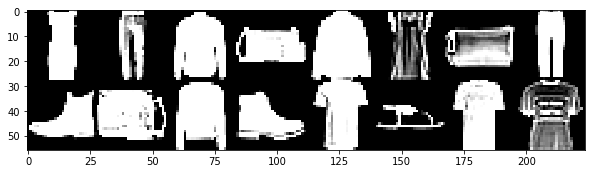

In [76]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

img = utils.make_grid(images, padding=0)
npimg = img.numpy()
plt.figure(figsize = (10, 7))
plt.imshow(np.transpose(npimg, (1,2,0)))
plt.show()

#### 드롭아웃

- 데이터도 중요하지만 모델에 직접 영향을 주어 과적합을 해결하는 좋은 방법으로 드롭 아웃이 있다.
- 드롭아웃은 학습 진행 과정에서 신경망의 일부를 사용하지 않는 방법
- 검증과 테스트 단계에서는 모든 뉴런을 사용
- 이유는, 학습에서 배재된 뉴런 외에 다른 뉴런들에게 가중치를 분산 시키고 개별 뉴런이 특징에 고정되는 현상을 방지

In [78]:
class Net(nn.Module):
    def __init__(self, dropout_p=0.2): # 학습시 20% 뉴런을 사용하지 않음
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        
        # 드롭아웃 확률
        self.dropout_p = dropout_p
    
    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        # 드롭아웃 추가
        x = F.dropout(x, training=self.training,
                     p=self.dropout_p)
        x = F.relu(self.fc2(x))
        #드롭아웃 추가
        x = F.dropout(x, training=self.training,
                     p=self.dropout_p)
        x = self.fc3(x)
        return x



In [81]:

USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

EPOCHS = 50
BATCH_SIZE = 64

model = Net(dropout_p=0.2).to(DEVICE)
optimizer = optim.SGD(model.parameters(), lr=0.01)



def train(model, train_loader, optimizer):
    model.train()

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        
        
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)

            test_loss += F.cross_entropy(output, target, reduction='sum').item()
            
            # 맞힌 개수 계산
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()
            
    test_loss /= len(test_loader.dataset)
    test_accuracy = 100 * correct / len(test_loader.dataset)
    return test_loss, test_accuracy




In [82]:
# 데이터셋에 노이즈를 추가하거나 모델에 드롭아웃을 적용할 때 최고 성능에 도달하는데 걸리는 시간은 길어짐
# 데이터셋이 늘고, 모델이 느리게 학습되기 때문

for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)
    
    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(epoch, test_loss, test_accuracy))

[1] Test Loss: 0.4812, Accuracy: 82.82%
[2] Test Loss: 0.4285, Accuracy: 84.51%
[3] Test Loss: 0.4030, Accuracy: 85.24%
[4] Test Loss: 0.3901, Accuracy: 85.69%
[5] Test Loss: 0.3754, Accuracy: 86.36%
[6] Test Loss: 0.3688, Accuracy: 86.24%
[7] Test Loss: 0.3545, Accuracy: 87.28%
[8] Test Loss: 0.3464, Accuracy: 87.53%
[9] Test Loss: 0.3514, Accuracy: 87.51%
[10] Test Loss: 0.3525, Accuracy: 87.55%
[11] Test Loss: 0.3421, Accuracy: 87.36%
[12] Test Loss: 0.3326, Accuracy: 88.01%
[13] Test Loss: 0.3279, Accuracy: 88.05%
[14] Test Loss: 0.3408, Accuracy: 87.91%
[15] Test Loss: 0.3247, Accuracy: 88.31%
[16] Test Loss: 0.3422, Accuracy: 87.79%
[17] Test Loss: 0.3196, Accuracy: 88.49%
[18] Test Loss: 0.3247, Accuracy: 88.58%
[19] Test Loss: 0.3128, Accuracy: 88.63%
[20] Test Loss: 0.3207, Accuracy: 88.33%
[21] Test Loss: 0.3170, Accuracy: 88.58%
[22] Test Loss: 0.3138, Accuracy: 88.72%
[23] Test Loss: 0.3201, Accuracy: 88.51%
[24] Test Loss: 0.3098, Accuracy: 88.97%
[25] Test Loss: 0.3206, A